In [4]:
# Import CSV file...
import pandas as pd
loan_dataset = pd.read_csv('https://raw.githubusercontent.com/hegde-23/LendingClubCaseStudy-PradeepHegde/master/loan_ph.csv',dtype=object)
loan_dataset.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [ ]:
# Metadata check

print('Number of rows and Columns: ', loan_dataset.shape)
print('Data set INFO :',loan_dataset.info())
print('Data Types: ',loan_dataset.dtypes)

Number of rows and Columns:  (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
Data set INFO : None
Data Types:  id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [ ]:
# Data Cleaning
# Check for any Duplicates

print(loan_dataset.duplicated(subset=None,keep='first').count())
duplicate_loandataset = loan_dataset[loan_dataset.duplicated(['id'])]
duplicate_loandataset

# No Duplicates found

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [ ]:
# Data Cleaning
# Number of empty row and column
print('Number of Empty Rows:')
print(loan_dataset.isnull().all(axis=1).sum())
# There are no empty rows in dataset.

print('Number of Empty Columns:')
print(loan_dataset.isnull().all(axis=0).sum())
# There are 54 empty Column in dataset.


Number of Empty Rows:
0
Number of Empty Columns:
54


In [ ]:
# Data cleaning
# Count the number of missing values
print(loan_dataset.isnull().sum()) 



id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [ ]:
# Data Cleaning
# Drop all columns which are all null and threshold of columns having null values > 20k to be removed

loan_dataset.dropna(axis=1,how='all',inplace=True,thresh=20000)
print(loan_dataset.shape) 
print(loan_dataset.isnull().sum()) 
print(loan_dataset.head())

# Rows and comuns ((39717, 54)) - column reduced to 54 columns from 111

(39717, 54)
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths  

In [ ]:
# Remove unwanted coulmns

columns_to_drop = ["url","desc","pub_rec","tax_liens"]
loan_dataset.drop(labels=columns_to_drop,inplace=True,axis=1)
print(loan_dataset.shape)

# Rows and comuns ((39717, 50)) - column reduced to 50 columns from 111

(39717, 50)


In [2]:
# Data cleaning
# format employment length column to have only numbers.

loan_dataset.emp_length.fillna('0',inplace=True)
loan_dataset['emp_length']=loan_dataset.emp_length.str.extract('(\d+)')
loan_dataset.head()

NameError: ignored

In [3]:
# Data cleaning
# Remove % symbol from intrest rate and revol_util column, so that it can be used in calculations later
loan_dataset['int_rate'] = loan_dataset['int_rate'].str.rstrip('%')
loan_dataset['revol_util'] = loan_dataset['revol_util'].str.rstrip('%')
loan_dataset.head()

NameError: ignored

In [ ]:
# Univariate Analysis - Quantitative Variables
# Percentage of loan status values
print(loan_dataset.loan_status.value_counts())
print(loan_dataset.loan_status.value_counts()*100/len(loan_dataset))

# Charged off are 14 percentage 

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64


In [ ]:
# Univariate Analysis - Quantitative Variables
# percentage of loan purpose

print(loan_dataset.purpose.value_counts()*100/len(loan_dataset))

# largest purpose are :
# debt_consolidation    46.934562
# credit_card           12.916383
# other                 10.053629

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64


In [ ]:
# Split the issue_d to correct format of month and year with new columns

loan_dataset.issue_d = pd.to_datetime(loan_dataset.issue_d, format='%b-%y')
loan_dataset ["issue_Month"] = loan_dataset["issue_d"].dt.month
loan_dataset ["issue_Year"] = loan_dataset["issue_d"].dt.year
loan_dataset.head()

# issue_month, issue_year new columns created.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issue_Month,issue_Year
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,Sep-13,0,1,INDIVIDUAL,0,0,0,0,12,2011
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,Apr-16,0,1,INDIVIDUAL,0,0,0,0,12,2011
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011


In [ ]:
# Univariate Analysis - Quantitative Variables
# get loan amount statistics, before that convert required number column to numeric
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_dataset[cols1] = loan_dataset[cols1].apply(pd.to_numeric)
loan_dataset.head()




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issue_Month,issue_Year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Sep-13,0,1,INDIVIDUAL,0,0,0,0,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Apr-16,0,1,INDIVIDUAL,0,0,0,0,12,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


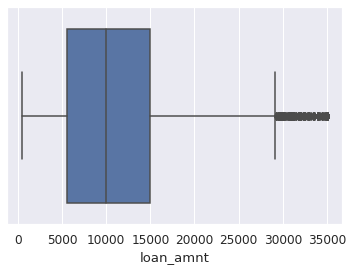

In [ ]:
# Box plot for loan amount distribution
import seaborn as sns

sns.boxplot(loan_dataset.loan_amnt)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


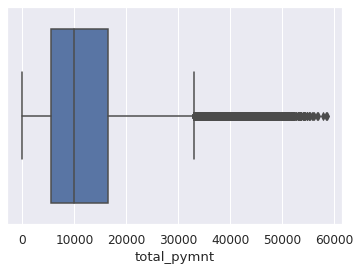

In [ ]:
sns.boxplot(loan_dataset.total_pymnt)

In [ ]:
# Remove Outlier 
print('Before Removal of Outliers :\n')
print(loan_dataset['annual_inc'].describe())

loan_dataset = loan_dataset[loan_dataset["annual_inc"] < loan_dataset["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan_dataset["annual_inc"].describe())


Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


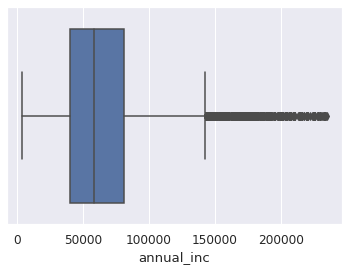

In [ ]:
sns.boxplot(loan_dataset.annual_inc)

In [ ]:
loan_dataset['int_rate'].describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

In [ ]:
# Correlation Matrix
import matplotlib.pyplot as plt

loan_corrs = loan_dataset.corr()
loan_corrs



,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,issue_Month,issue_Year
loan_amnt,1.000000,0.981566,0.939660,0.306502,0.929720,0.162464,0.415993,0.075917,0.885336,0.067186,0.121797
funded_amnt,0.981566,1.000000,0.958071,0.310198,0.955709,0.161912,0.411176,0.075616,0.901830,0.057798,0.132380
funded_amnt_inv,0.939660,0.958071,1.000000,0.304266,0.904120,0.170586,0.394002,0.083602,0.879718,0.084224,0.260648
int_rate,0.306502,0.310198,0.304266,1.000000,0.280611,0.017540,0.073150,0.113924,0.305093,0.040325,0.054976
installment,0.929720,0.955709,0.904120,0.280611,1.000000,0.134578,0.413737,0.063923,0.855475,0.038672,0.057510
emp_length,0.162464,0.161912,0.170586,0.017540,0.134578,1.000000,0.190902,0.053956,0.148235,0.025720,0.099162
annual_inc,0.415993,0.411176,0.394002,0.073150,0.413737,0.190902,1.000000,-0.108919,0.395080,0.018900,0.035883
dti,0.075917,0.075616,0.083602,0.113924,0.063923,0.053956,-0.108919,1.000000,0.074074,0.019303,0.094918
total_pymnt,0.885336,0.901830,0.879718,0.305093,0.855475,0.148235,0.395080,0.074074,1.000000,0.046657,0.130251
issue_Month,0.067186,0.057798,0.084224,0.040325,0.038672,0.025720,0.018900,0.019303,0.046657,1.000000,-0.021754


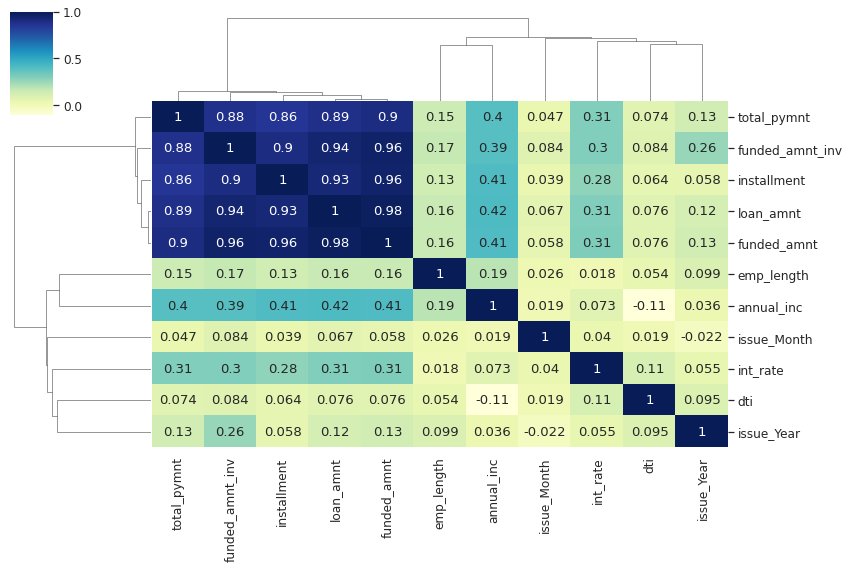

In [ ]:
# Bivariate Analysis - Correlation Matrix

sns.set(font_scale=1.1)
sns.clustermap(loan_corrs,annot=True,figsize=(12, 8),cmap="YlGnBu")
plt.show()

# Observation is loan_amount,investor amount, funded amount are highly correlated
# Employee length increase , annual income increases - Positive correlation
# Annual income to DTI is negative correlated - when annual income is low , dti is high and vice versa.


In [ ]:
# Segmented Univariate Analysis on diffrent data sets

loan_chargedoff = loan_dataset.loc[loan_dataset['loan_status'] == 'Charged Off']
loan_paid = loan_dataset.loc[loan_dataset['loan_status'] == 'Fully Paid']
loan_current = loan_dataset.loc[loan_dataset['loan_status'] == 'Current']
print('Charged Off loan Count: ',loan_chargedoff.shape)
print('Paid loan Count: ',loan_paid.shape)
print('Current loan Count: ',loan_current.shape)

# charged off count is 5584

Charged Off loan Count:  (5584, 52)
Paid loan Count:  (32609, 52)
Current loan Count:  (1126, 52)


In [ ]:
# Derived columns
# categorise loan amounts , this will help in analysis further in bivariate analysis.
loan_dataset['loan_amnt_breakup'] = pd.cut(loan_dataset['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes , this will help in analysis further in bivariate analysis.
loan_dataset['annual_inc_breakup'] = pd.cut(loan_dataset['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issue_Month,issue_Year,loan_amnt_breakup,annual_inc_breakup
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,13648,83.70,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011,0-7000,20000-40000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,1687,9.40,4,f,0,0,1008.710000,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,12,2011,0-7000,20000-40000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,2956,98.50,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011,0-7000,0-20000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,5598,21,37,f,0,0,12231.890000,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,12,2011,7000-14000,40000-60000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,27783,53.90,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,12,2011,0-7000,60000-80000


In [ ]:
# Bivariate Analysis on annual income against Chargedoff percentage

chargedoff_vs_loan = loan_dataset.groupby(['annual_inc_breakup', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
chargedoff_vs_loan['Total'] = chargedoff_vs_loan['Charged Off'] + chargedoff_vs_loan['Current'] + chargedoff_vs_loan['Fully Paid'] 
chargedoff_vs_loan['Chargedoff_Proportion'] = chargedoff_vs_loan['Charged Off'] / chargedoff_vs_loan['Total']
chargedoff_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

loan_status,annual_inc_breakup,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1080,362,8531,9973,0.108292


In [ ]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan_dataset.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.0,74.0,1251.0,1797.0,0.262660
10,renewable_energy,19.0,1.0,81.0,101.0,0.188119
3,educational,55.0,0.0,268.0,323.0,0.170279
9,other,629.0,126.0,3203.0,3958.0,0.158919
8,moving,91.0,7.0,479.0,577.0,0.157712
5,house,58.0,14.0,299.0,371.0,0.156334
7,medical,106.0,12.0,568.0,686.0,0.154519
2,debt_consolidation,2752.0,580.0,15165.0,18497.0,0.148781
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,338.0,97.0,2459.0,2894.0,0.116793


In [ ]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan_dataset.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.323529
5,F,312,71,642,1025,0.304390
4,E,704,176,1906,2786,0.252692
3,D,1112,216,3916,5244,0.212052
2,C,1342,262,6411,8015,0.167436
1,B,1414,344,10167,11925,0.118574
0,A,601,40,9377,10018,0.059992


In [ ]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loan_dataset.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,227,42,801,1070,0.212150
10,10,1316,386,7038,8740,0.150572
7,7,262,62,1435,1759,0.148948
1,1,1090,143,6533,7766,0.140355
5,5,456,87,2712,3255,0.140092
8,8,203,43,1216,1462,0.138851
6,6,305,58,1846,2209,0.138072
3,3,551,82,3426,4059,0.135748
4,4,456,94,2860,3410,0.133724
2,2,561,97,3684,4342,0.129203


In [ ]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = loan_dataset.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,107.0,17.0,368.0,492.0,0.217480
40,SD,12.0,2.0,50.0,64.0,0.187500
0,AK,14.0,2.0,63.0,79.0,0.177215
9,FL,497.0,85.0,2252.0,2834.0,0.175371
24,MO,114.0,16.0,551.0,681.0,0.167401
13,ID,1.0,0.0,5.0,6.0,0.166667
31,NM,30.0,5.0,149.0,184.0,0.163043
11,HI,28.0,8.0,138.0,174.0,0.160920
4,CA,1116.0,149.0,5767.0,7032.0,0.158703
